# 상관계수 (Correlation Coefficient)

상관계수는 두개의 다른 확률변수가 얼마나 큰 관계를 갖는지 수치적으로 알아보는 것

## Index

1. 분산
2. 공분산
3. 상관계수
4. 결정계수
5. 프리미어리그 데이터 상관계수 분석

In [1]:
import numpy as np

샘플데이터 생성

In [21]:
data1 = np.array([80, 85, 100, 90, 95])
data2 = np.array([70, 80, 100, 95, 95])

## 분산(Variance)
- 1개의 이산정도를 나타냄
- 편차제곱의 평균

$ variance = \frac{\sum_{i=1}^n{(x_i-\bar{x})^2}}{n}, (\bar{x}:평균) $

분산을 계산하는 함수를 작성해보자

In [19]:
# Variance code

def get_var(ls):
    SUM_ = 0
    MEAN_ = 0
    for i in ls:
        avg = np.mean(ls)
        SUM_ += (i - avg) ** 2
    result = SUM_ / len(ls)
    return result

In [26]:
# 분산과 표준편차를 구해보자 (**0.5 는 루트와 같음)

get_var(data1), get_var(data2), get_var(data1) ** 0.5, get_var(data2) ** 0.5

(50.0, 126.0, 7.0710678118654755, 11.224972160321824)

data2가 더 큰 분산을 가진다.

일반 함수와 numpy 함수의 퍼포먼스 비교

In [27]:
# numpy를 이용한 분산 계산(var)m 표준편차 계산(std)

np.var(data1), np.var(data2), np.std(data1), np.std(data2)

(50.0, 126.0, 7.0710678118654755, 11.224972160321824)

In [46]:
# 속도차이 비교

p_data1 = np.random.randint(60, 100, int(10E3)) # 10의 3승 = 만개
p_data2 = np.random.randint(60, 100, int(10E3)) # 10의 3승 = 만개

print(p_data1.size)

10000


In [42]:
# 일반함수

In [53]:
%%time

get_var(p_data1), get_var(p_data2)

Wall time: 387 ms


(134.46939431000146, 135.8277265600001)

In [ ]:
# numpy

In [56]:
%%time

np.var(p_data1), np.var(p_data2)

Wall time: 1 ms


(134.46939431, 135.82772655999997)

387배 속도 차이

## 공분산(covariance)
- 2개의 확률변수의 상관정도를 나타냄
- 평균 편차곱
- **방향성**은 보여줄수 있으나 강도를 나타내는데 한계가 있다
    - 표본데이터의 크기에 따라서 값의 차이가 큰 단점이 있다

$ covariance = \frac{\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}}{n}, (\bar{x}:x의 평균, \bar{y}:y의 평균) $

### x가 증가할 때 y도 증가하는 경우

cov matrix 
 [[ 62.5   93.75]
 [ 93.75 157.5 ]] 

covariance
 93.75


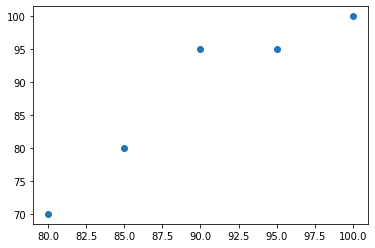

In [82]:
import matplotlib.pyplot as plt

x = np.array([80, 85, 100, 90, 95])
y = np.array([70, 80, 100, 95, 95])

plt.plot(x, y, 'o')

# 공분산 행렬 계산
print('cov matrix \n',np.cov(x, y),'\n')

# 공분산 확인
print('covariance\n',np.cov(x, y)[0, 1])

### x가 증가할 때 y가 감소하는 경우

cov matrix 
 [[ 62.5 -87.5]
 [-87.5 130. ]] 

covariance
 -87.5


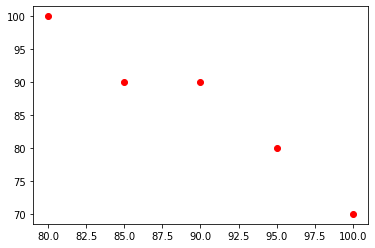

In [91]:
x = np.array([80, 85, 100, 90, 95])
y = np.array([100, 90, 70, 90, 80])

plt.plot(x, y, 'or')

# 공분산 행렬 계산
print('cov matrix \n',np.cov(x, y),'\n')

# 공분산 확인
print('covariance\n',np.cov(x, y)[0, 1])

**표본데이터의 크기에 따라 값의 차이가 크다는 단점이 있다.**

In [95]:
data5 = np.array([800, 850, 1000, 900, 950])
data6 = np.array([1000, 900, 700, 900, 800])
np.cov(data5, data6)[0, 1]

-8750.0

공분산이 음수를 가지는 위의 두 데이터쌍을 보면 둘다 유사한 데이터의 움직임을 보인다. 

하지만 데이터 스케일이 달라 공분산 값 역시 크기가 매우 다르게 나타나는 것을 보인다. 이릍 통해 공분산의 단점인 방향성은 확인할 수 있지만 그 강도를 확인하기 어렵다는 단점을 확인할 수 있다.

In [93]:
# 공분산 파이썬 코드 구현

x = np.array([80, 85, 100, 90, 95])
y = np.array([70, 80, 100, 95, 95])

x_mean = np.mean(x)
y_mean = np.mean(y)
cov = 0
for i, j in zip(x, y):
    cov += (i - x_mean)*(j - y_mean)
    
# 자유도 지정
cov / (len(x)-1)

93.75

자유도를 지정하는 이유!!

- 표본은 모집단을 과소평가(Underestimate)하는 경향이 있다. 예를 들어 표본의 분산은 모집단의 분산보다 작은 상태가 되기 때문에 이를 보정하기 위해 표본 분산의 분모를 작게 만들어 전체 표본분산을 크게 만드는 것이다.

In [94]:
cov / (len(x)-1) == np.cov(x, y)[0,1]

True

이러한 공분산의 한계를 극복하기 위해 상관계수라는 것을 이용한다.

## 피어슨 상관계수(Correlation coefficient)

- 공분산의 한계를 극복하기 위해 만들어짐
- -1 ~ 1까지의 수를 가지며 0과 가까울수록 상관도가 적음을 의미
- x의 분산과 y의 분산을 곱한 결과의 제곱근을 나눠주면 x나 y의 변화량이 클수록 0에 가까워짐
- https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.corrcoef.html

$ correlation-coefficient = \frac{공분산}{\sqrt{{x분산} \cdot {y분산}}} $

최종 상관계수

$ r = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{{\sum(x-\bar{x})^2}\cdot{\sum(y-\bar{y})^2}}} $

In [101]:
data1 = np.array([80, 85, 100, 90, 95])
data2 = np.array([70, 80, 100, 95, 95])

data3 = np.array([80, 85, 100, 90, 95])
data4 = np.array([100, 90, 70, 90, 80])

data5 = np.array([800, 850, 1000, 900, 950])
data6 = np.array([1000, 900, 700, 900, 800])


In [108]:
# correlation coefficient function

np.corrcoef(data1, data2)[0,1],\
np.corrcoef(data3, data4)[0,1],\
np.corrcoef(data5, data6)[0,1]

(0.9449111825230682, -0.970725343394151, -0.970725343394151)

**데이터 스케일에 상관없이 관계 정도를 수치화 했을 때 강도를 나타낼 수 있다.**

## 결정계수(Coefficeint of determination : R-squared)

- x로부터 y를 예측할 수 있는 정도
- 상관계수의 제곱(상관계수를 양수화)
- 수치가 클수록 회귀분석을 통해 예측할 수 있는 수치의 정도가 더 정확

In [111]:
# 결정계수 확인

np.corrcoef(data1, data2)[0,1] ** 2,\
np.corrcoef(data1, data4)[0,1] ** 2

(0.892857142857143, 0.9423076923076923)

위 결과를 통해 data1에 영향을 미치는 연속형 변수로 data2보다 data4가 더 큰 영향을 미치는 것으로 확인할 수 있다.

## 프리미어리그 데이터 상관계수 분석

- 2016년 프리미어리그 `성적에서 득점과 실점 데이터중`에 승점에 영향을 더 많이 준 데이터는?

- 위 결과를 통해 공격력 훈련에 집중할지, 수비력 훈련에 집중할지를 분석

In [112]:
import pandas as pd

In [115]:
df = pd.read_csv('datas/premierleague.csv')
df.tail()

,name,gf,ga,points
15,Huddersfield Town,28,58,37
16,Southampton,37,56,36
17,Swansea City,28,56,33
18,Stoke City,35,68,33
19,West Bromwich Albion,31,56,31


In [118]:
# 1위 부터 20위 까지의 득점 데이터

gf = np.array(df['gf'])
gf

array([106,  68,  74,  84,  62,  74,  36,  44,  56,  39,  45,  45,  48,
        44,  34,  28,  37,  28,  35,  31], dtype=int64)

In [120]:
# 1위부터 20위 까지의 실점 데이터

ga = np.array(df['ga'])
ga

array([27, 28, 36, 38, 38, 51, 39, 58, 60, 47, 55, 61, 68, 64, 54, 58, 56,
       56, 68, 56], dtype=int64)

In [124]:
# 1위부터 20위 까지의 승점 데이터

points = df.points.values
points

array([100,  81,  77,  75,  70,  63,  54,  49,  47,  44,  44,  44,  42,
        41,  40,  37,  36,  33,  33,  31], dtype=int64)

In [ ]:
# 승점을 득점과 실점 데이터로 비교해 결정계수를 계산

In [130]:
# 득점과 승점

np.corrcoef(gf, points)[0, 1] ** 2

0.8683266496886471

In [131]:
# 실점과 승점

np.corrcoef(ga,points)[0, 1] ** 2

0.757933920368845

In [137]:
data1, data2 = np.corrcoef(gf, points)[0, 1] ** 2, np.corrcoef(ga,points)[0, 1] ** 2

round(data1, 2), round(data2, 2)

(0.87, 0.76)

위 결과를 통해 승점과 득점이 더 깊은 관계를 가지며 공격력 훈련에 집중하는 것이 더 유리하다고 말할 수 있다.